In [13]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import category_encoders as ce

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error

In [16]:
df= pd.read_csv('testing.csv')

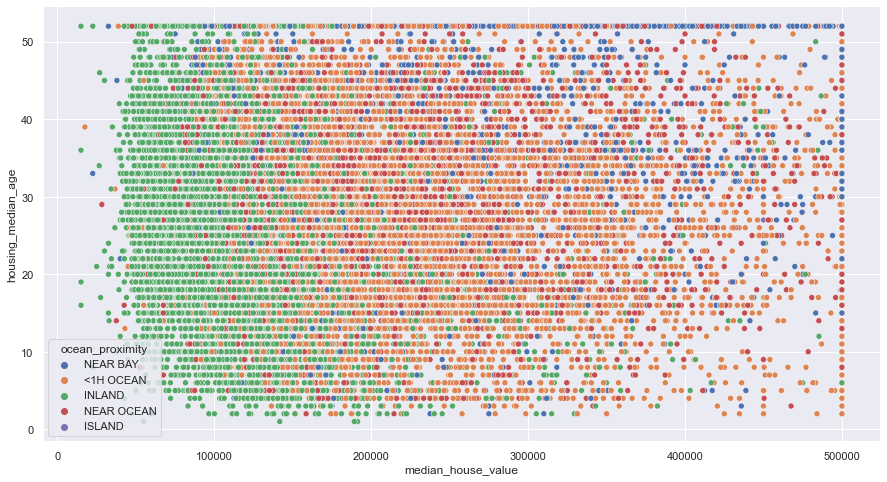

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="median_house_value", y="housing_median_age", hue="ocean_proximity") 
plt.show()


In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


the dataset seems to have a lot of outliers in ther several features, we will drop the outliers.

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
df['total_bedrooms'].isna().sum() *100 /len(df)

1.002906976744186

In [24]:
df=df.dropna()

In [25]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

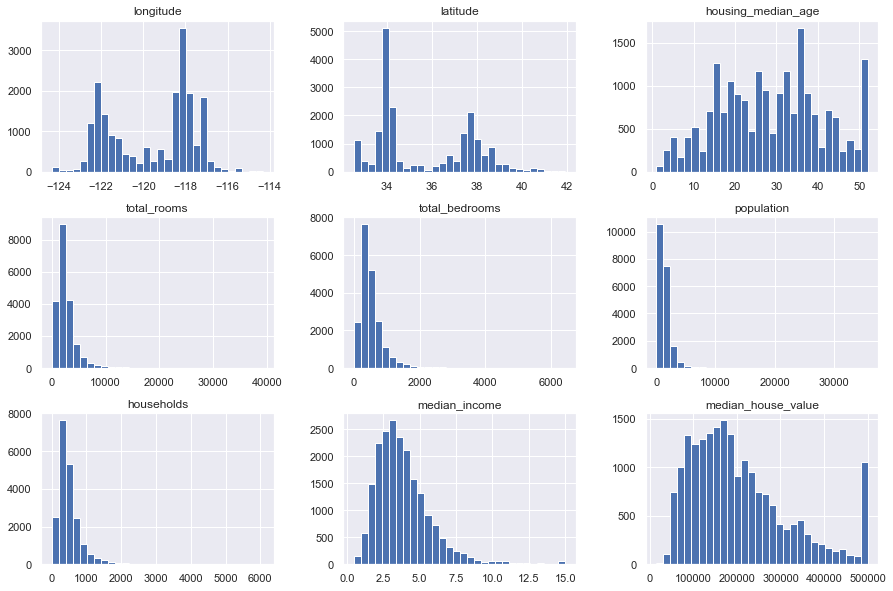

In [26]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [32]:
print('The oldest house is:', df['housing_median_age'].max(), 'years', 'old' '.')

The oldest house is: 52.0 years old.


In [33]:
X = df.drop(columns='median_house_value')
y= df['median_house_value']

In [34]:


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, shuffle= True, random_state= 0)

In [35]:
X_train.shape

(15324, 9)

In [36]:
X_test.shape

(5109, 9)

In [37]:
encoder_gender=ce.OneHotEncoder(cols=['ocean_proximity'],
                                handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [38]:
X_enc = encoder_gender.fit_transform(X_train)

In [39]:
X_enc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
4919,-118.25,34.00,36.0,1033.0,267.0,1112.0,229.0,1.7237,1.0,0.0,0.0,0.0,0.0
3791,-118.37,34.16,6.0,6526.0,2007.0,3298.0,1790.0,2.7231,1.0,0.0,0.0,0.0,0.0
4627,-118.31,34.07,26.0,5062.0,2055.0,4533.0,1822.0,2.3105,1.0,0.0,0.0,0.0,0.0
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,0.0,1.0,0.0,0.0,0.0
13322,-117.65,34.06,41.0,1171.0,334.0,1479.0,334.0,2.2500,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,0.0,0.0,1.0,0.0,0.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,0.0,0.0,1.0,0.0,0.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,0.0,1.0,0.0,0.0,0.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,1.0,0.0,0.0,0.0,0.0


In [40]:
scaler= StandardScaler()

In [41]:
X_enc= pd.DataFrame(scaler.fit_transform(X_enc), columns=X_enc.columns)

In [42]:
X_enc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,0.655455,-0.761601,0.583532,-0.736337,-0.645298,-0.277052,-0.709617,-1.124021,1.122279,-0.354759,-0.680684,-0.384532,-0.013993
1,0.595572,-0.686647,-1.799128,1.782437,3.488416,1.639795,3.372258,-0.599525,1.122279,-0.354759,-0.680684,-0.384532,-0.013993
2,0.625514,-0.728809,-0.210688,1.111131,3.602449,2.722735,3.455935,-0.816062,1.122279,-0.354759,-0.680684,-0.384532,-0.013993
3,-1.350624,1.032594,1.616018,-0.652882,-0.609663,-0.752318,-0.618095,-1.248716,-0.891044,2.818813,-0.680684,-0.384532,-0.013993
4,0.954870,-0.733493,0.980642,-0.673058,-0.486126,0.044761,-0.435051,-0.847813,-0.891044,-0.354759,1.469110,-0.384532,-0.013993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15319,0.964851,-0.705386,-1.957972,0.772268,0.561556,0.044761,0.425254,1.160007,-0.891044,-0.354759,1.469110,-0.384532,-0.013993
15320,0.236275,0.372068,-0.925486,-0.807870,-0.759332,-0.405075,-0.738381,-0.979016,-0.891044,-0.354759,1.469110,-0.384532,-0.013993
15321,-1.345633,1.187186,-0.448954,0.092249,-0.113142,0.138587,-0.089883,0.088291,-0.891044,2.818813,-0.680684,-0.384532,-0.013993
15322,0.850075,-0.883400,-1.560862,-0.969277,-0.873365,-0.149905,-0.876971,-0.257401,1.122279,-0.354759,-0.680684,-0.384532,-0.013993


In [43]:
model= LinearRegression()

In [44]:
model.fit(X_enc, y_train)

LinearRegression()

In [51]:
model.coef_

array([-55443.95805263, -55971.32068372,  13899.34419902, -12370.10999214,
        42845.33076562, -40992.75240035,  15658.93088155,  74358.30600277,
         6041.75862777,   2744.03117021, -12139.67841521,   5185.76939929,
         3155.07338907])

In [52]:
model.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR OCEAN',
       'ocean_proximity_ISLAND'], dtype=object)

In [54]:
df_1 = pd.DataFrame(model.feature_names_in_, columns=['Feature'])
df_1['Importance'] = model.coef_
df_1

,Feature,Importance
0,longitude,-55443.958053
1,latitude,-55971.320684
2,housing_median_age,13899.344199
3,total_rooms,-12370.109992
4,total_bedrooms,42845.330766
5,population,-40992.752400
6,households,15658.930882
7,median_income,74358.306003
8,ocean_proximity_<1H OCEAN,6041.758628
9,ocean_proximity_NEAR BAY,2744.031170


<br> <b> What we see here is the features and the level of importance. What values affected the model..<b/> <br/>

In [45]:
y_pred_train= model.predict(X_enc)

In [46]:
mean_squared_error(y_train, y_pred_train, squared=False)

68652.32309001731

In [47]:
X_enc_test = encoder_gender.transform(X_test)

In [48]:
X_enc_test= pd.DataFrame(scaler.transform(X_enc_test), columns=X_enc_test.columns)

In [49]:
y_pred_test= model.predict(X_enc_test)

In [55]:
mean_squared_error(y_test, y_pred_test, squared=False)

68662.07101729966

RMSE test score 68662

<br> <b>The model is underfiting because RMSE score is high in both test and train.....<b/> <br/>